Develop the EXP3 algorithm, which is devoted to dealing with adversarial settings. This algorithm can be also used to deal with non-stationary settings when no information about the specific form of non-stationarity is known beforehand. Consider a simplified version of Step 5 in which the bid is fixed. First, apply the EXP3 algorithm to this setting. The expected result is that EXP3 performs worse than the two non-stationary versions of UCB1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import p6.UCB_simple as ucb
import p6.Environment6_1 as env
import p6.SWUCB as swucb
import p6.CumSumUCB as cu_ucb
import p6.EXP3_learner as exp3
import utils.projectParameters as param

In [2]:
T = 365
n_experiments = 100

class_id = 1
env = env.Environment6_1(class_id, T)
opt = np.array([env.get_opt(t) for t in range(T)]) 
n_arms = env.n_arms

bid 1.2482828282828284


In [3]:
ucb_rewards_per_experiment = []
swucb_rewards_per_experiment = []
cusumucb_rewards_per_experiment = []
exp3_rewards_per_experiment = []

cumregret_ucb = []
cumregret_swucb = []
cumregret_cusumucb = []
cumregret_exp3 = []

cumreward_ucb = []
cumreward_swucb = []
cumreward_cusumucb = []
cumreward_exp3 = []

In [4]:
for e in range(0, n_experiments):
    # Create environment and learners
    ucb_learner = ucb.UCB(n_arms=n_arms)
    swucb_learner = swucb.SWUCBLearner(n_arms=n_arms, window_size=int(3 * (T ** 0.5)))
    cusum_ucb_learner = cu_ucb.CusumUCBLearner(n_arms, M=100, eps=0.1, h=2 * np.log(T), alpha=np.sqrt(np.log(T) / T))
    exp3_learner = exp3.EXP3(n_arms, upperbound_total_reward=np.max(np.array(param.prices) * 0.7) * T,
                                    reward_max=np.max(np.array(param.prices) * 0.7))

    if e % 10 == 0:
        print(f"Experiment {e}")

    for t in range(0, T):
        # Pull arms and update learners
        # UCB
        pulled_arm = ucb_learner.pull_arm()
        reward = env.round(pulled_arm, t)
        ucb_learner.update(pulled_arm, reward)

        # SW-UCB
        pulled_arm = swucb_learner.pull_arm()
        reward = env.round(pulled_arm, t)
        swucb_learner.update(pulled_arm, reward)

        # Cusum-UCB
        pulled_arm = cusum_ucb_learner.pull_arm()
        reward = env.round(pulled_arm, t)
        cusum_ucb_learner.update(pulled_arm, reward)

        # EXP3
        pulled_arm = exp3_learner.pull_arm()
        reward = env.round(pulled_arm, t)
        exp3_learner.update(pulled_arm, reward)

    # Store collected rewards
    ucb_rewards_per_experiment.append(ucb_learner.collected_rewards)
    swucb_rewards_per_experiment.append(swucb_learner.collected_rewards)
    cusumucb_rewards_per_experiment.append(cusum_ucb_learner.collected_rewards)

    cumregret_ucb.append(np.cumsum(opt - ucb_rewards_per_experiment[e]))
    cumregret_swucb.append(np.cumsum(opt - swucb_rewards_per_experiment[e]))
    cumregret_cusumucb.append(np.cumsum(opt - cusumucb_rewards_per_experiment[e]))

    cumreward_ucb.append(np.cumsum(ucb_rewards_per_experiment[e]))
    cumreward_swucb.append(np.cumsum(swucb_rewards_per_experiment[e]))
    cumreward_cusumucb.append(np.cumsum(cusumucb_rewards_per_experiment[e]))

    exp3_rewards_per_experiment.append(exp3_learner.collected_rewards)
    cumregret_exp3.append(np.cumsum(opt - exp3_rewards_per_experiment[e]))
    cumreward_exp3.append(np.cumsum(exp3_rewards_per_experiment[e]))

Experiment 0
Experiment 10
Experiment 20
Experiment 30
Experiment 40
Experiment 50
Experiment 60
Experiment 70
Experiment 80
Experiment 90


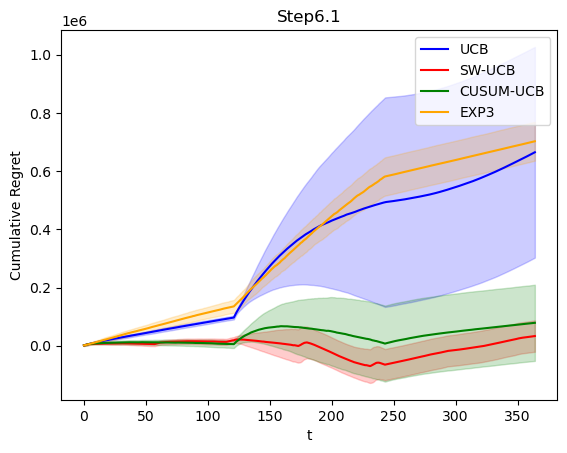

In [5]:
plt.figure(0)
plt.title("Step6.1")
plt.xlabel("t")
plt.ylabel("Cumulative Regret")
plt.plot(np.mean(cumregret_ucb, axis=0), 'b')
plt.plot(np.mean(cumregret_swucb, axis=0), 'r')
plt.plot(np.mean(cumregret_cusumucb, axis=0), 'g')
plt.plot(np.mean(cumregret_exp3, axis=0), 'orange')
plt.fill_between(range(T), np.mean(cumregret_ucb, axis=0) - np.std(cumregret_ucb, axis=0),
                 np.mean(cumregret_ucb, axis=0) + np.std(cumregret_ucb, axis=0), color="blue", alpha=0.2)
plt.fill_between(range(T), np.mean(cumregret_swucb, axis=0) - np.std(cumregret_swucb, axis=0),
                 np.mean(cumregret_swucb, axis=0) + np.std(cumregret_swucb, axis=0), color="red", alpha=0.2)
plt.fill_between(range(T), np.mean(cumregret_cusumucb, axis=0) - np.std(cumregret_cusumucb, axis=0),
                 np.mean(cumregret_cusumucb, axis=0) + np.std(cumregret_cusumucb, axis=0), color="green", alpha=0.2)
plt.fill_between(range(T), np.mean(cumregret_exp3, axis=0) - np.std(cumregret_exp3, axis=0),
                 np.mean(cumregret_exp3, axis=0) + np.std(cumregret_exp3, axis=0), color="orange", alpha=0.2)
plt.legend(["UCB", "SW-UCB", "CUSUM-UCB", "EXP3"])
plt.show()

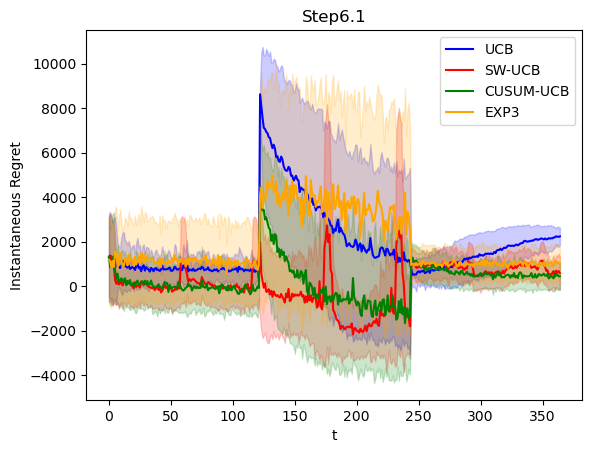

In [6]:
plt.figure(1)
plt.title("Step6.1")
plt.xlabel("t")
plt.ylabel("Instantaneous Regret")
plt.plot(np.mean(opt - ucb_rewards_per_experiment, axis=0), 'b')
plt.plot(np.mean(opt - swucb_rewards_per_experiment, axis=0), 'r')
plt.plot(np.mean(opt - cusumucb_rewards_per_experiment, axis=0), 'g')
plt.plot(np.mean(opt - exp3_rewards_per_experiment, axis=0), 'orange')
plt.fill_between(range(T),
                 np.mean(opt - ucb_rewards_per_experiment, axis=0) - np.std(opt - ucb_rewards_per_experiment, axis=0),
                 np.mean(opt - ucb_rewards_per_experiment, axis=0) + np.std(opt - ucb_rewards_per_experiment, axis=0),
                 color="blue", alpha=0.2)
plt.fill_between(range(T),
                 np.mean(opt - swucb_rewards_per_experiment, axis=0) - np.std(opt - swucb_rewards_per_experiment,
                                                                              axis=0),
                 np.mean(opt - swucb_rewards_per_experiment, axis=0) + np.std(opt - swucb_rewards_per_experiment,
                                                                              axis=0), color="red", alpha=0.2)
plt.fill_between(range(T),
                 np.mean(opt - cusumucb_rewards_per_experiment, axis=0) - np.std(opt - cusumucb_rewards_per_experiment,
                                                                                 axis=0),
                 np.mean(opt - cusumucb_rewards_per_experiment, axis=0) + np.std(opt - cusumucb_rewards_per_experiment,
                                                                                 axis=0), color="green", alpha=0.2)
plt.fill_between(range(T),
                 np.mean(opt - exp3_rewards_per_experiment, axis=0) - np.std(opt - exp3_rewards_per_experiment, axis=0),
                 np.mean(opt - exp3_rewards_per_experiment, axis=0) + np.std(opt - exp3_rewards_per_experiment, axis=0),
                 color="orange", alpha=0.2)
plt.legend(["UCB", "SW-UCB", "CUSUM-UCB", "EXP3"])
plt.show()

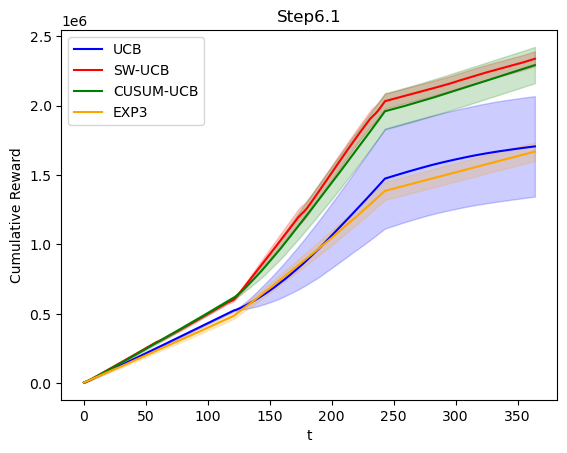

In [7]:
plt.figure(2)
plt.title("Step6.1")
plt.xlabel("t")
plt.ylabel("Cumulative Reward")
plt.plot(np.mean(cumreward_ucb, axis=0), 'b')
plt.plot(np.mean(cumreward_swucb, axis=0), 'r')
plt.plot(np.mean(cumreward_cusumucb, axis=0), 'g')
plt.plot(np.mean(cumreward_exp3, axis=0), 'orange')
plt.fill_between(range(T), np.mean(cumreward_ucb, axis=0) - np.std(cumreward_ucb, axis=0),
                 np.mean(cumreward_ucb, axis=0) + np.std(cumreward_ucb, axis=0), color="blue", alpha=0.2)
plt.fill_between(range(T), np.mean(cumreward_swucb, axis=0) - np.std(cumreward_swucb, axis=0),
                 np.mean(cumreward_swucb, axis=0) + np.std(cumreward_swucb, axis=0), color="red", alpha=0.2)
plt.fill_between(range(T), np.mean(cumreward_cusumucb, axis=0) - np.std(cumreward_cusumucb, axis=0),
                 np.mean(cumreward_cusumucb, axis=0) + np.std(cumreward_cusumucb, axis=0), color="green", alpha=0.2)
plt.fill_between(range(T), np.mean(cumreward_exp3, axis=0) - np.std(cumreward_exp3, axis=0),
                 np.mean(cumreward_exp3, axis=0) + np.std(cumreward_exp3, axis=0), color="orange", alpha=0.2)
plt.legend(["UCB", "SW-UCB", "CUSUM-UCB", "EXP3"])
plt.show()

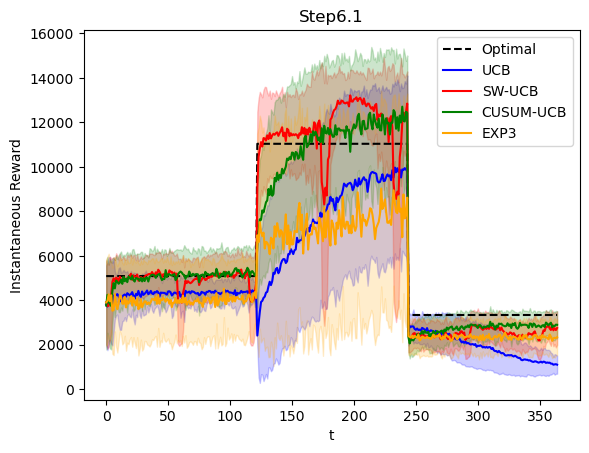

In [8]:
plt.figure(3)
plt.title("Step6.1")
plt.xlabel("t")
plt.ylabel("Instantaneous Reward")
plt.plot(opt, 'k--')
plt.plot(np.mean(ucb_rewards_per_experiment, axis=0), 'b')
plt.plot(np.mean(swucb_rewards_per_experiment, axis=0), 'r')
plt.plot(np.mean(cusumucb_rewards_per_experiment, axis=0), 'g')
plt.plot(np.mean(exp3_rewards_per_experiment, axis=0), 'orange')
plt.fill_between(range(T), np.mean(ucb_rewards_per_experiment, axis=0) - np.std(ucb_rewards_per_experiment, axis=0),
                 np.mean(ucb_rewards_per_experiment, axis=0) + np.std(ucb_rewards_per_experiment, axis=0), color="blue",
                 alpha=0.2)
plt.fill_between(range(T), np.mean(swucb_rewards_per_experiment, axis=0) - np.std(swucb_rewards_per_experiment, axis=0),
                 np.mean(swucb_rewards_per_experiment, axis=0) + np.std(swucb_rewards_per_experiment, axis=0),
                 color="red", alpha=0.2)
plt.fill_between(range(T),
                 np.mean(cusumucb_rewards_per_experiment, axis=0) - np.std(cusumucb_rewards_per_experiment, axis=0),
                 np.mean(cusumucb_rewards_per_experiment, axis=0) + np.std(cusumucb_rewards_per_experiment, axis=0),
                 color="green", alpha=0.2)
plt.fill_between(range(T), np.mean(exp3_rewards_per_experiment, axis=0) - np.std(exp3_rewards_per_experiment, axis=0),
                 np.mean(exp3_rewards_per_experiment, axis=0) + np.std(exp3_rewards_per_experiment, axis=0),
                 color="orange", alpha=0.2)
plt.legend(["Optimal", "UCB", "SW-UCB", "CUSUM-UCB", "EXP3"])
plt.show()